# Orders - Multivariate Regression of review_score

In [1]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
#import data
from olist.order import Order
data = Order().get_training_data()

Let's recall our simple analysis from yesterday's exercice: 

Based our the correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated together. In this exercice, we will use `statsmodel` to distinguish the effect of one feature, **keeping the other fixed**.

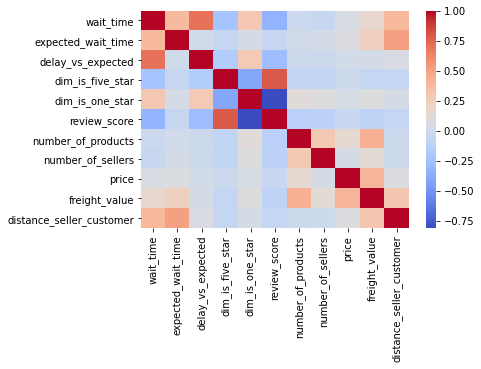

In [4]:
sns.heatmap(data.corr(), cmap='coolwarm')

(0.0, 5.929633086202845)

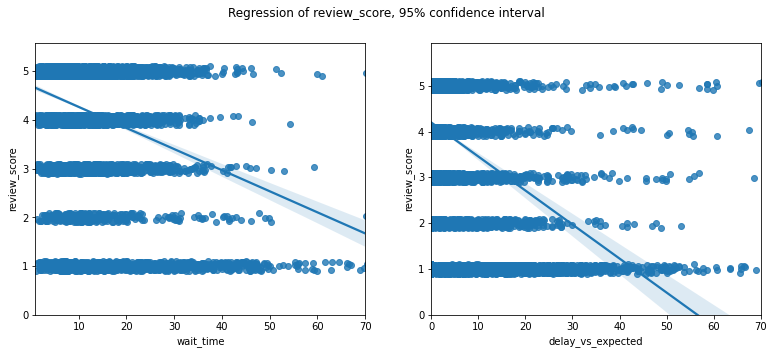

In [5]:
sample = data.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = data.delay_vs_expected, y= data.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

❓Use [statsmodels](statsmodels.org) instead of seaborn to make 
 - an OLS regression (`model1`) of `review_score` over `wait_time`
 - an OLS regression (`model2`) of `review_score` over `wait_time`
 
For each, Print the `summary` table and interpret results:
- Make sure to understand how these results match those of seaborn regplot
- Read the regression performance metric R-square, as well as individual regressions coefficients, t-values, p-values, and 95% confidence intervals

In [6]:
#import modules 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
# YOUR CODE HERE
model1 = smf.ols('review_score ~ wait_time', data=data).fit()

In [8]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.221e+04
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        11:53:19   Log-Likelihood:            -1.5630e+05
No. Observations:               96525   AIC:                         3.126e+05
Df Residuals:                   96523   BIC:                         3.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7138      0.006    725.216      0.0

In [9]:
# YOUR CODE HERE
model2 = smf.ols('review_score ~ delay_vs_expected', data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7710.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        11:53:19   Log-Likelihood:            -1.5834e+05
No. Observations:               96525   AIC:                         3.167e+05
Df Residuals:                   96523   BIC:                         3.167e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1994      0.00

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two feature is the most explicative for low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the dependent variables, and `review_score` is the target variable

In [10]:
model3 = smf.ols('review_score ~ wait_time + delay_vs_expected', data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6254.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        11:53:19   Log-Likelihood:            -1.5616e+05
No. Observations:               96525   AIC:                         3.123e+05
Df Residuals:                   96522   BIC:                         3.124e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6442      0.00

👉 Your answer: **Holding wait_time constant, each additional day of delay reduces review_score on average by 0.0191 [0.017 - 0.21]** points

----
❓Our multivariate regression have allowed us to isolate the impact of one feature, whilst controlling for the effect of other features. These new coefficients are called **partial correlation** coefficients. 

- Plot the **partial regression plots** using the handy [`statsmodels.graphics.plot_partregress_grid`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html).
- Contraty to the **simple regression plots** with seaborn above, what can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 
 
<details>
    <summary>Hint</summary>
e(variable|X) stands for "error" (i.e deviation) of the variable around its mean value. We are only interested in the slope of the partial correlation but not it's intercept: all the lines cross through [0,0]
</details>

Text(0.5, 1.0, 'Partial Regression Plots')

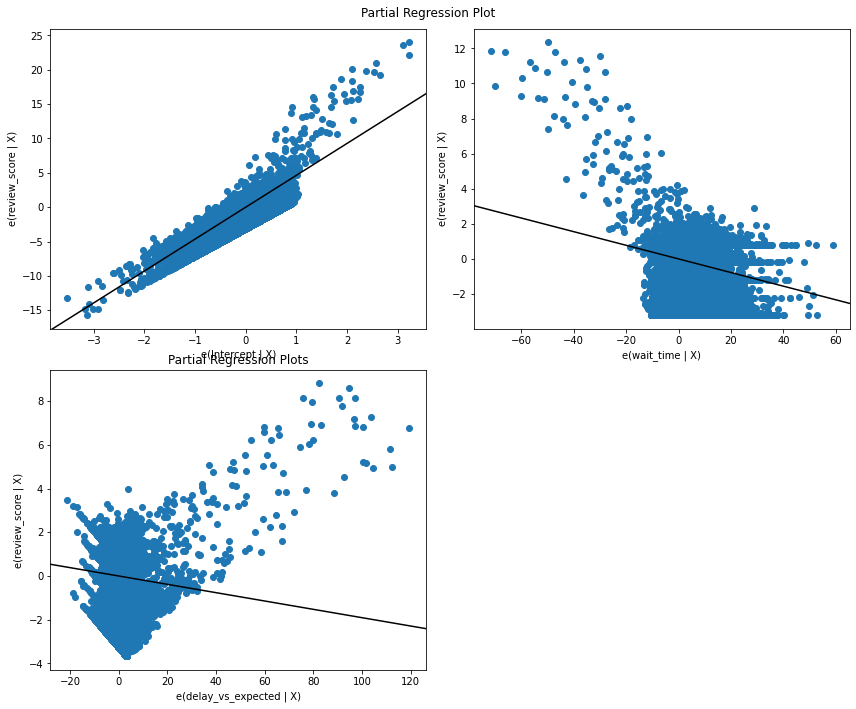

In [11]:
# Your code
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(model3, fig=fig)
plt.title('Partial Regression Plots')

---
❓ R-square is quite low: no more than 12% of the variation of review_score is explained  by the variations of `wait_time` and `delay_vs_expected`. Let's try to add more feature to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset.
    - Do not to create **data leaks**: do not to add features that are directly derived from the `review_score`
    - Do not add features perfectly colinear to each other
    - z-standardize $z = \frac{x - \mu}{\sigma}$ each features in order to be able to compare their relative coefficients together 
- What are the most important features?
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [12]:
# Select features

In [13]:
features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer",
]

In [14]:
# standardize features

In [15]:
data_standardized = data.copy()
for f in features:
    mu = data[f].mean()
    sigma = data[f].std()
    data_standardized[f] = data[f].map(lambda x: (x - mu) / sigma)
data_standardized

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,-0.431707,15.544063,-0.162787,delivered,0,0,4,-0.264004,-0.112813,-0.511860,-0.651997,-0.979467
1,53cdb2fc8bc7dce0b6741e2150273451,0.128587,19.137766,-0.162787,delivered,0,0,4,-0.264004,-0.112813,-0.087278,-0.000604,0.428808
2,47770eb9100c2d0c44946d9cf07ec65d,-0.331330,26.639711,-0.162787,delivered,1,0,5,-0.264004,-0.112813,0.109912,-0.164844,-0.146045
3,949d5b44dbf5de918fe9c16f97b45f8a,0.068497,26.188819,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.440019,0.205392,2.052600
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.014771,12.112049,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.560153,-0.651997,-0.959121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96528,9c5dedf39a927c1b2549525ed64a053c,-0.454616,18.587442,-0.162787,delivered,1,0,5,-0.264004,-0.112813,-0.310793,-0.449712,-0.893083
96529,63943bddc261676b46f01ca7ac2f7bd8,1.010273,23.459051,-0.162787,delivered,0,0,4,-0.264004,-0.112813,0.181705,-0.124016,-0.213301
96530,83c1379a015df1e13d02aae0204711ab,1.289682,30.384225,-0.162787,delivered,1,0,5,-0.264004,-0.112813,0.330507,1.960071,0.616570
96531,11c177c8e97725db2631073c19f07b62,0.474942,37.105243,-0.162787,delivered,0,0,2,1.586072,-0.112813,1.067531,2.709822,-0.387946


In [16]:
# Create and train model4

In [64]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + freight_value + distance_seller_customer'

In [65]:
model4 = smf.ols(formula = formula, data = data_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2348.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        12:16:56   Log-Likelihood:            -1.5446e+05
No. Observations:               96525   AIC:                         3.089e+05
Df Residuals:                   96517   BIC:                         3.090e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

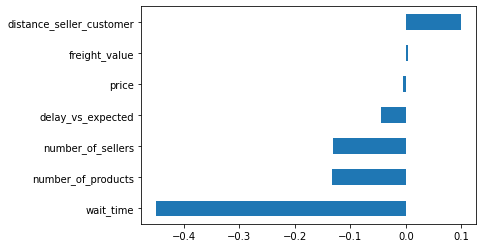

In [71]:
model4.params[1:].sort_values().plot(kind='barh')

<details>
    <summary>💡Explanations</summary>
    
- These partial regression coefficients are more informative than the simple correlation coefficients in explaining the relative impact of each feature in explaining review_score.
    - Wait time remains the biggest explanatory variable
    - The more products and sellers there are for a single order, the lower the review_score. Distance plays also a role.
    - We cannot conclude anything about price and freight_value: p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics is much greater than 1 (at least one features have a very low p-value)

- R-square isn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-square is frequent when the number of observation (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

Regression performance should not be measured only by it's R-square!  

It's alway a good idea to visualize the distribution of the predictions, and especially residuals.

❓ Compute the residuals, and the associated RMSE. Plot the `residuals` in a histogram.

In [72]:
# Your code
predicted_review_score = model4.predict(data_standardized[features])
residuals = predicted_review_score - data_standardized.review_score

In [73]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

1.1986853369569426

Text(0.5, 1.0, 'residuals density plot')

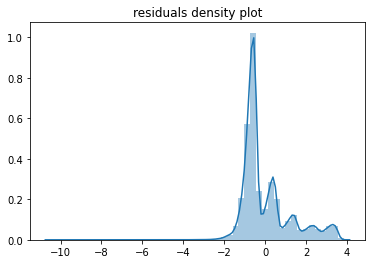

In [74]:
sns.distplot(residuals)
plt.title('residuals density plot')

❓Not that easy to interpret? Plot in the same axe the histogram of `review_score` as well as that of the `predicted_review_score` for each rows of the dataset. Compare also the mean of the two distributions

<Figure size 432x288 with 0 Axes>

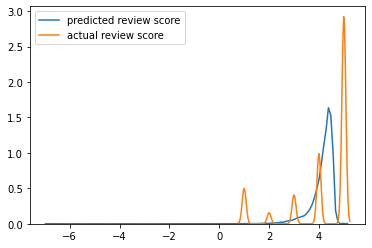

<Figure size 432x288 with 0 Axes>

In [75]:
# Your code here
sns.kdeplot(predicted_review_score, label='predicted review score')
sns.kdeplot(data.review_score, label = 'actual review score')
plt.figure('distribution of predicted and actual values')

In [76]:
# Means should be equals in a OLS regression
print(data.review_score.mean())
print(predicted_review_score.mean())

4.142004662004662
4.142004662004652


❓Another common way to visualize residuals is the [QQplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html). Plot it below and make sure to understand the link with the histogram above.

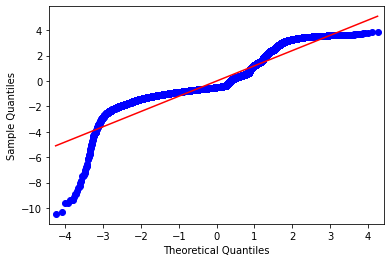

In [81]:
sm.qqplot(residuals, line='s');

❓ Create a box plot (or a violin plot) of the residuals, splitted by `review_score`

In [82]:
data_extended = pd.concat(
    [
        pd.DataFrame(residuals, columns=['residuals']),
        pd.DataFrame(predicted_review_score, columns=['predicted_review_score']),
        data,
    ],
    axis=1,
)

Text(0.5, 1.0, 'Residuals vs Actual')

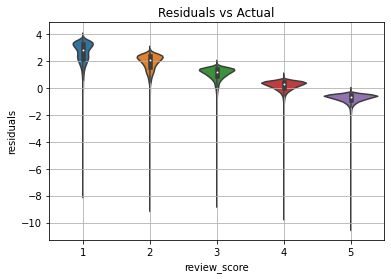

In [83]:
sns.violinplot('review_score', 'residuals', data=data_extended)
plt.grid()
plt.title('Residuals vs Actual')

<details>
    <summary>Solution</summary>
👉 A violinplot would be the best approach. We can see that our model is better at predicting 4 stars than any other scores...which is obvious because review_score.mean()=4.14</details>

✅ Great job! Don't forget to *save*, *commit* and *push* this notebook when you are done